**Проведение разведочного анализа данных и построение модели предсказания стоимости дома**

Цель: изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.

Описание задания:
В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
data = fetch_california_housing(as_frame=True).frame

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [ ]:
def get_scores(X, y, random_seed):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

  model = LinearRegression()

  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  r2 = r2_score(y_test, y_pred)

  return model, rmse, r2

In [ ]:
model, rmse, r2 = get_scores(data.drop(columns='MedHouseVal'), data['MedHouseVal'], 42)
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

RMSE: 0.7455813830127763
R^2: 0.575787706032451


**Проведем разведочный анализ данных**

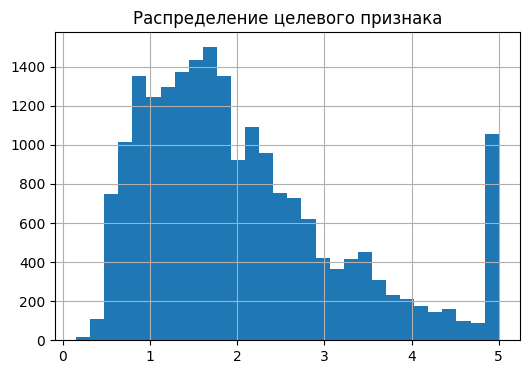

In [ ]:
data['MedHouseVal'].hist(bins=30, figsize=(6,4))
plt.title("Распределение целевого признака")
plt.show()

На графике наблюдается выброс - 5, удалим его и посмотрим, как изменятся метрики

In [ ]:
test_data = data[data['MedHouseVal'] != 5]

In [ ]:
model, rmse, r2 = get_scores(test_data.drop(columns='MedHouseVal'), test_data['MedHouseVal'], 42)
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

RMSE: 0.7382592047379484
R^2: 0.5896022527297242


Метрики улучшились, можем удалить данный выброс

In [ ]:
data = test_data

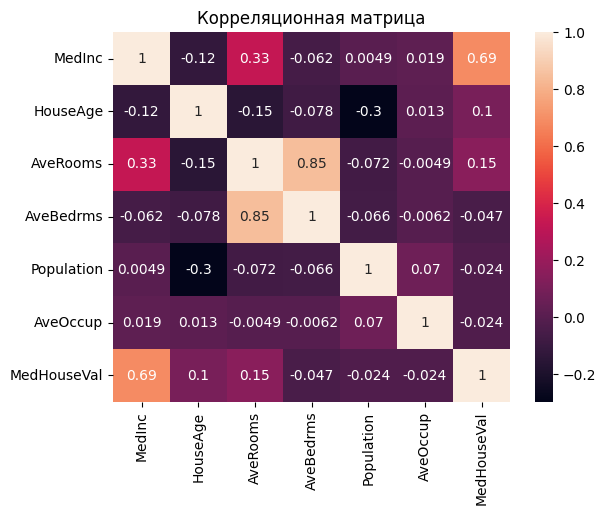

In [ ]:
import seaborn as sns
columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','MedHouseVal']
corr_matrix = data.loc[:,columns].corr()
sns.heatmap(corr_matrix, annot=True).set_title('Корреляционная матрица')
plt.show()

Корреляция присутствует между количеством комнат и ванных комнат - один признак можно будет удалить. Корреляция есть и у целевого признака и среднего дохода. Удалять его не нужно, т.к корреляция поможет в предсказании, но можно это проверить

In [ ]:
test_data = data.drop(columns='MedInc')

In [ ]:
model, rmse, r2 = get_scores(test_data.drop(columns='MedHouseVal'), test_data['MedHouseVal'], 42)
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

RMSE: 0.8869623657817557
R^2: 0.40762378431624546


Действительно, R^2 сильно ухудшился

In [ ]:
test_data = data
test_data = data.drop(columns='AveBedrms')

In [ ]:
model, rmse, r2 = get_scores(test_data.drop(columns='MedHouseVal'), test_data['MedHouseVal'], 42)
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

RMSE: 0.7334577741880645
R^2: 0.5949231169777071


Удаление признака с корреляцией с другим признаком помогло улучшить метрику RMSE, R^2 выросло, удалим этот признак

In [ ]:
data = test_data

In [ ]:
def box(data, column_names):
  data_box = data.copy()

  for column_name in column_names:
    column = data_box[column_name]

    plt.figure(figsize=(7, 6))
    sns.boxplot(x=data[column_name])
    plt.title(f"Ящик с усами для '{column_name}'")
    plt.xlabel(column_name)
    plt.show()


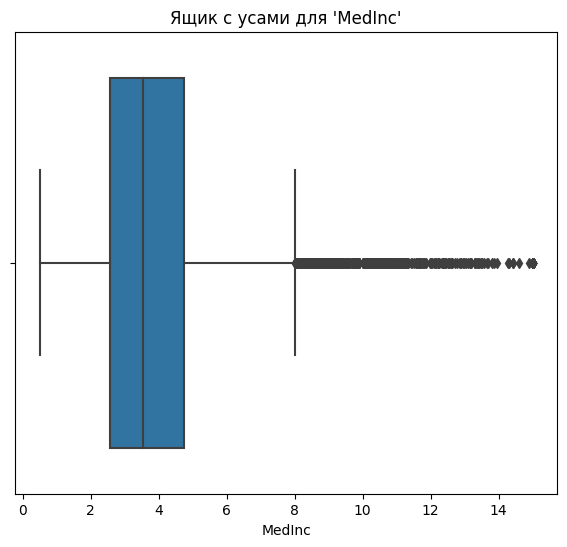

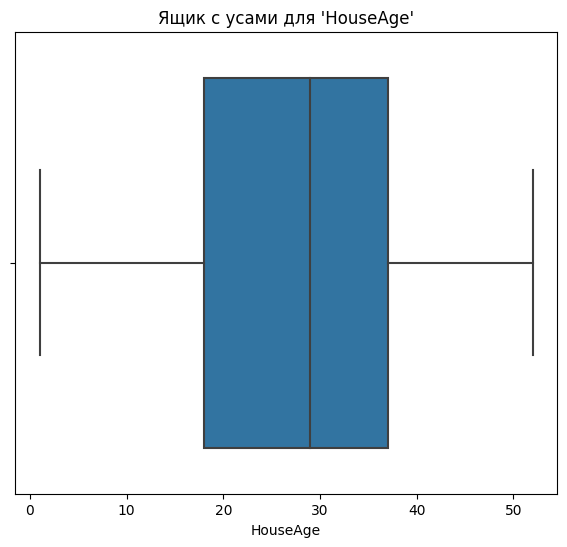

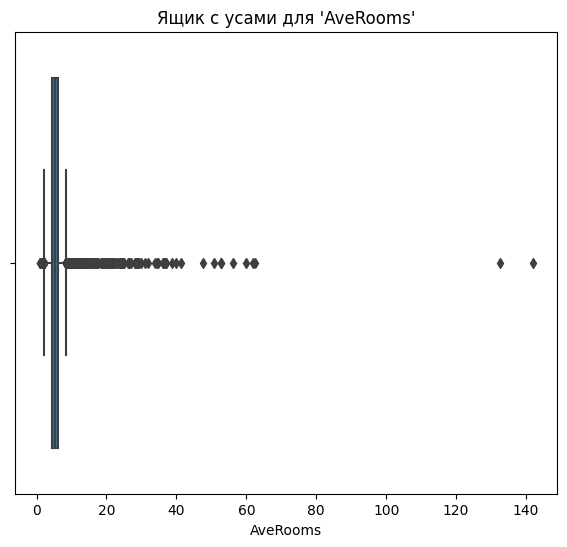

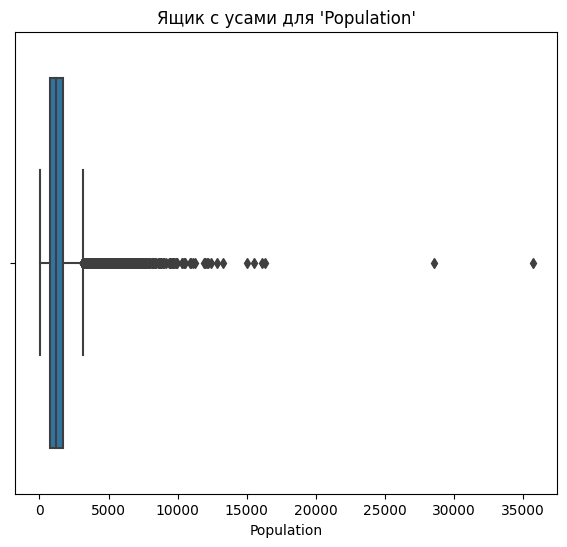

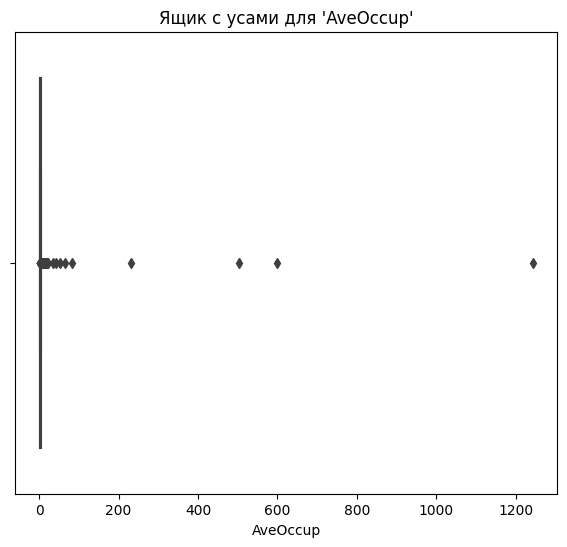

In [ ]:
columns_names = ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup']
box(data, columns_names)

На графиках видно, что в данных очень много неадекватных выбросов - количество комнат доходит до 100. Имеются в виду многоквартирные дома? Почему их не рассматривают как отдельные квартиры? Ничего непонятно. Я бы удалила все выбросы хотя бы в комнатах и количестве проживающих

In [ ]:
def remove_outliers(data, column_names):
  data_no_outliers = data.copy()
  for column_name in column_names:
    column = data_no_outliers[column_name]

    median = column.median()
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data_no_outliers = data_no_outliers[(column >= lower_bound) & (column <= upper_bound)]

  return data_no_outliers

In [ ]:
columns = ['AveRooms', 'Population', 'AveOccup']
data_no_outliers = remove_outliers(data, columns)

In [ ]:
data_no_outliers.describe()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,18311.000000,18311.000000,18311.000000,18311.000000,18311.000000,18311.000000,18311.000000,18311.000000
mean,3.845832,29.420021,5.268748,1232.218830,2.831853,35.683913,-119.639093,2.074183
std,1.804693,12.376915,1.135057,632.695529,0.624871,2.148895,2.011992,1.150114
min,0.499900,1.000000,2.032738,5.000000,1.161290,32.540000,-124.350000,0.149990
25%,2.573400,19.000000,4.474767,776.000000,2.407926,33.940000,-121.850000,1.188000
50%,3.541700,30.000000,5.225490,1126.000000,2.780488,34.300000,-118.610000,1.824000
75%,4.737100,38.000000,5.999373,1593.000000,3.206897,37.740000,-118.040000,2.667000
max,15.000100,52.000000,8.467890,3139.000000,4.538835,41.950000,-114.550000,5.000010


In [ ]:
test_data = data_no_outliers
model, rmse, r2 = get_scores(test_data.drop(columns='MedHouseVal'), test_data['MedHouseVal'], 42)
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

RMSE: 0.6673479986046855
R^2: 0.6605225224175917


RMSE уменьшился на 0.07, R^2 тоже улучшился, выбросы негативно влияли на модель

In [ ]:
data = data_no_outliers

In [ ]:
data.head(5)

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422


Попробуем прологарифмировать население и владельцев и вычислить корень из возраста дома

In [ ]:
test_data['Population'] = np.log(data['Population'])
test_data['AveOccup'] = np.log(data['AveOccup'])
test_data['HouseAge'] = np.sqrt(data['HouseAge'])

In [ ]:
model, rmse, r2 = get_scores(test_data.drop(columns='MedHouseVal'), test_data['MedHouseVal'], 42)
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

RMSE: 0.665649239096278
R^2: 0.6622486281384645


Некоторые улучшения есть

In [ ]:
data['Population'] = np.log(data['Population'])
data['AveOccup'] = np.log(data['AveOccup'])
data['HouseAge'] = np.sqrt(data['HouseAge'])

**Выводы**

|Модель |Преобразования|Результат  
|-----|:-----|:---:|
|Модель |-  |RMSE: 0.7456 / R^2: 0.5758 |
|Модель 2|Удалили выброс в целевом признаке|RMSE: 0.7383 / R^2: 0.5896  
|Модель 3 |Удалили признак с корреляцией  |RMSE: 0.7335 / R^2: 0.5949 |
|Модель 4|Удалили выбросы |RMSE: 0.6673 / R^2: 0.6605
|Модель 5|Изменили признаки математически | RMSE: 0.6656 / R^2: 0.6622

Разведочный анализ данных помог улучшить качество модели